## Step 1:  Generate Subduction Convergence Kinematics Statistics 

In this notebook, we are going to show you how to generate subduction convergence kinematics statistics. The data generated in this step will be used in the subsequent steps of this spatial temporal exploration workflow.

The script finds subduction zones using so-called "topological plate boundaries" in our global plate model. We sample the subduction zones and calculate subduction convergence kinematics statistics at each trench sampling point.

The implementation details can be found in [convergence.py](convergence.py) which depends on the PlateTectonicTools package. You can find the package at [https://github.com/EarthByte/PlateTectonicTools.git](https://github.com/EarthByte/PlateTectonicTools.git).
    
The parameters being used to run this process can be found in [config.json](config.json).

Relevant parameters:
* plate_tectonic_tools_path -- the path to the PlateTectonicTools code
* rotation_files -- location of the rotation files
* topology_files -- location of the topology files
* threshold_sampling_distance_degrees -- the default threshold sampling distance along trenches (subduction zones)
* time.start -- start time
* time.end -- end time
* time.step -- time interval between steps
* velocity_delta_time -- time interval for velocity calculation
* anchor_plate_id - the anchor plate id
* convergence_data_filename_prefix -- the prefix of the output files
* convergence_data_filename_ext -- the extension name of the output files
* convergence_data_dir -- the name of the folder in which the output files go

You may modify the above parameters and re-run the script to see the differences. 

Now, let's run the script and check out the output.

Before running this notebook is necessary to have all the grid stored in /spatio-temporal-exploration-master-JDiazRod/data/. These are:

AgeGrids
Carbonate-sed-thickness
Ocean_Crust_CO2_grids
Predicted_oceanic_sediment_thickness

Also, make sure that the config.json file(s) is updated with these, as follows:

    "grid_files" : [
        ["../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-{time:d}.nc", "seafloor_age"],
      ["../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_{time:d}.nc", "carbonate_sediment_thickness"],
        ["../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_{time:d}.nc", "total_sediment_thick"],
        ["../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_{time:d}.nc", "ocean_crust_carb_percent"]


In [2]:
#
# SEE HERE! 
# This cell must run first to setup the working environment
#

import glob, os
import convergence , Utils
import pandas as pd

#load the config file
Utils.load_config('config.json')
Utils.print_parameters()

Below are the parameters in use. Check the parameters carefully to ensure a sucussful run.
{ 'agegrid_url': 'https://www.earthbyte.org/webdav/ftp/Data_Collections/Muller_etal_2016_AREPS/Muller_etal_2016_AREPS_Agegrids/Muller_etal_2016_AREPS_Agegrids_v1.17/Muller_etal_2016_AREPS_v1.17_netCDF/Muller_etal_2016_AREPS_v1.17_AgeGrid-{}.nc',
  'anchor_plate_id': 0,
  'case_name': 'case_AREPS',
  'coastlines': '../data/Global_EarthByte_230-0Ma_GK07_AREPS_Coastlines.gpmlz',
  'convergence_data_dir': './convergence_data/AREPS/',
  'convergence_data_filename_ext': 'csv',
  'convergence_data_filename_prefix': 'subStats',
  'coreg_input_dir': './coreg_input/AREPS/',
  'coreg_input_files': [ 'deposit_candidates.csv',
                         'negative_deposits.csv',
                         'positive_deposits.csv'],
  'coreg_output_dir': 'coreg_output',
  'feature_names': [ 'conv_rate',
                     'dist_nearest_edge',
                     'subduction_volume_km3y',
                     'car

In [3]:
%%capture --no-stdout
print('running convergence...')
print('this may take a while, be patient...')
print('')

#run the convergence script
#this will generate a bunch of Subduction Convergence Kinematics Statistics files
#by default the files are placed in ./convergence_data
convergence.run_it()

# now, let's list all the output files
files = sorted(glob.glob(Utils.get_convergence_dir() + '*'), key=os.path.getmtime)
print('The number of generated files: ', len(files))
print('The first 10 files:')
for i in range(10):
    print(files[i])

running convergence...
this may take a while, be patient...

generating convergence data ...
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-230.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_230.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_230.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_230.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-229.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_229.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_229.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_229.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-228.nc, seafloor_age
Querying ../data/carbonate_sed_thicknes

Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_210.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-209.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_209.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_209.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_209.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-208.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_208.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_208.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_208.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-207.nc, seafloor_age
Querying ../data/carbonate_sed_thic

Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_189.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-188.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_188.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_188.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_188.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-187.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_187.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_187.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_187.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-186.nc, seafloor_age
Querying ../data/carbonate_sed_thic

Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_168.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-167.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_167.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_167.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_167.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-166.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_166.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_166.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_166.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-165.nc, seafloor_age
Querying ../data/carbonate_sed_thic

Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_147.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-146.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_146.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_146.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_146.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-145.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_145.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_145.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_145.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-144.nc, seafloor_age
Querying ../data/carbonate_sed_thic

Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_126.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-125.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_125.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_125.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_125.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-124.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_124.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_124.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_124.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-123.nc, seafloor_age
Querying ../data/carbonate_sed_thic

Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_105.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-104.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_104.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_104.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_104.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-103.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_103.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_103.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_103.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-102.nc, seafloor_age
Querying ../data/carbonate_sed_thic

Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-83.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_83.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_83.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_83.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-82.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_82.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_82.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_82.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-81.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_81.nc, carbonate_sediment_thickness
Querying ../data/predicted_oc

Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_62.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_62.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_62.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-61.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_61.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_61.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_61.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-60.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_60.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_60.nc, total_sediment_thick
Querying ../dat

Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_41.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-40.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_40.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_40.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_40.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-39.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_39.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_39.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_39.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-38.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/deco

Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-19.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_19.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_19.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_19.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-18.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_18.nc, carbonate_sediment_thickness
Querying ../data/predicted_oceanic_sediment_thickness/sed_thick_0.2d_18.nc, total_sediment_thick
Querying ../data/ocean_crust_CO2_grids/ocean_crust_carb_percent_18.nc, ocean_crust_carb_percent
Querying ../data/AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-17.nc, seafloor_age
Querying ../data/carbonate_sed_thickness/decompacted_sediment_thickness_0.5_17.nc, carbonate_sediment_thickness
Querying ../data/predicted_oc

The above cell took a while to finish and created a number of csv files. Each file contains the subduction convergence kinematics statistics at certain time. For example, the file "subStats_230.00.csv" contains data at time 230Ma.

Now, let's open one of the files and see what is inside.

In [4]:
time=0.
conv_dir = Utils.get_convergence_dir()
pd.read_csv(f"{conv_dir}{Utils.get_parameter('convergence_data_filename_prefix')}_\
{time:0.2f}.{Utils.get_parameter('convergence_data_filename_ext')}")

,trench_lon,trench_lat,conv_rate,conv_angle,trench_abs_rate,trench_abs_angle,arc_len,trench_norm,subducting_pid,trench_pid,...,trench_abs_paral,subducting_abs_rate,subducting_abs_angle,subducting_abs_ortho,subducting_abs_paral,seafloor_age,subduction_volume_km3y,carbonate_sediment_thickness,total_sediment_thick,ocean_crust_carb_percent
0,-179.97,50.45,6.81,-55.30,1.22,164.64,0.18,7.02,901,111,...,0.32,-5.93,-63.05,2.69,-5.29,55.49,0.06,37.86,126.58,2.18
1,-179.92,-37.32,4.84,-39.07,-5.01,43.98,0.20,293.70,901,806,...,3.48,-7.39,2.96,7.38,0.38,121.95,0.08,76.80,166.99,2.46
2,-179.82,-37.14,4.87,-38.79,-5.00,44.15,0.20,293.64,901,806,...,3.48,-7.40,2.95,7.39,0.38,121.11,0.08,104.43,166.55,2.46
3,-179.79,-11.20,17.15,68.36,10.46,-135.15,0.17,196.40,901,821,...,-7.38,8.64,96.15,-0.93,8.59,100.37,0.11,10.19,156.95,2.63
4,-179.72,-36.96,4.90,-38.51,-4.98,44.33,0.20,293.58,901,806,...,3.48,-7.42,2.95,7.41,0.38,121.11,0.08,104.43,166.55,2.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3024,179.67,-38.04,4.72,-40.25,-5.08,43.28,0.20,293.95,901,806,...,3.48,-7.32,2.99,7.31,0.38,121.95,0.08,76.80,166.99,2.40
3025,179.74,50.47,6.82,-55.21,1.22,164.56,0.18,6.80,901,111,...,0.32,-5.94,-62.87,2.71,-5.29,54.96,0.06,37.98,126.05,2.20
3026,179.78,-37.86,4.75,-39.95,-5.06,43.45,0.20,293.88,901,806,...,3.48,-7.34,2.98,7.33,0.38,121.95,0.08,76.80,166.99,2.40
3027,179.88,-37.68,4.78,-39.65,-5.05,43.63,0.20,293.82,901,806,...,3.48,-7.36,2.97,7.35,0.38,121.95,0.08,76.80,166.99,2.40


There are 3029 rows in the csv file, which means there are 3029 trench sampling points. Each row contains data for each sampled point along trench. 

There are 20 columns in the csv file. They are the subduction convergence kinematics statistics. The meaning of each column is listed below.

* 0 longitude of sample point
* 1 latitude of sample point
* 2 subducting convergence (relative to trench) velocity magnitude (in cm/yr)
* 3 subducting convergence velocity obliquity angle (angle between trench normal vector and convergence velocity vector)
* 4 trench absolute (relative to anchor plate) velocity magnitude (in cm/yr)
* 5 trench absolute velocity obliquity angle (angle between trench normal vector and trench absolute velocity vector)
* 6 length of arc segment (in degrees) that current point is on
* 7 trench normal azimuth angle (clockwise starting at North, ie, 0 to 360 degrees) at current point
* 8 subducting plate ID
* 9 trench plate ID
* 10 distance (in degrees) along the trench line to the nearest trench edge
* 11 the distance (in degrees) along the trench line from the start edge of the trench
* 12 convergence velocity orthogonal component(in cm/yr)
* 13 convergence velocity parallel component(in cm/yr) 
* 14 the trench plate absolute velocity orthogonal component(in cm/yr)
* 15 the trench plate absolute velocity parallel component(in cm/yr)
* 16 the subducting plate absolute velocity magnitude (in cm/yr)
* 17 the subducting plate absolute velocityobliquity angle (in degrees)
* 18 the subducting plate absolute velocity orthogonal component       
* 19 the subducting plate absolute velocity parallel component

Now, let's draw some maps to visualize the data. The data visualization is important because it allows trends and patterns to be more easily seen.

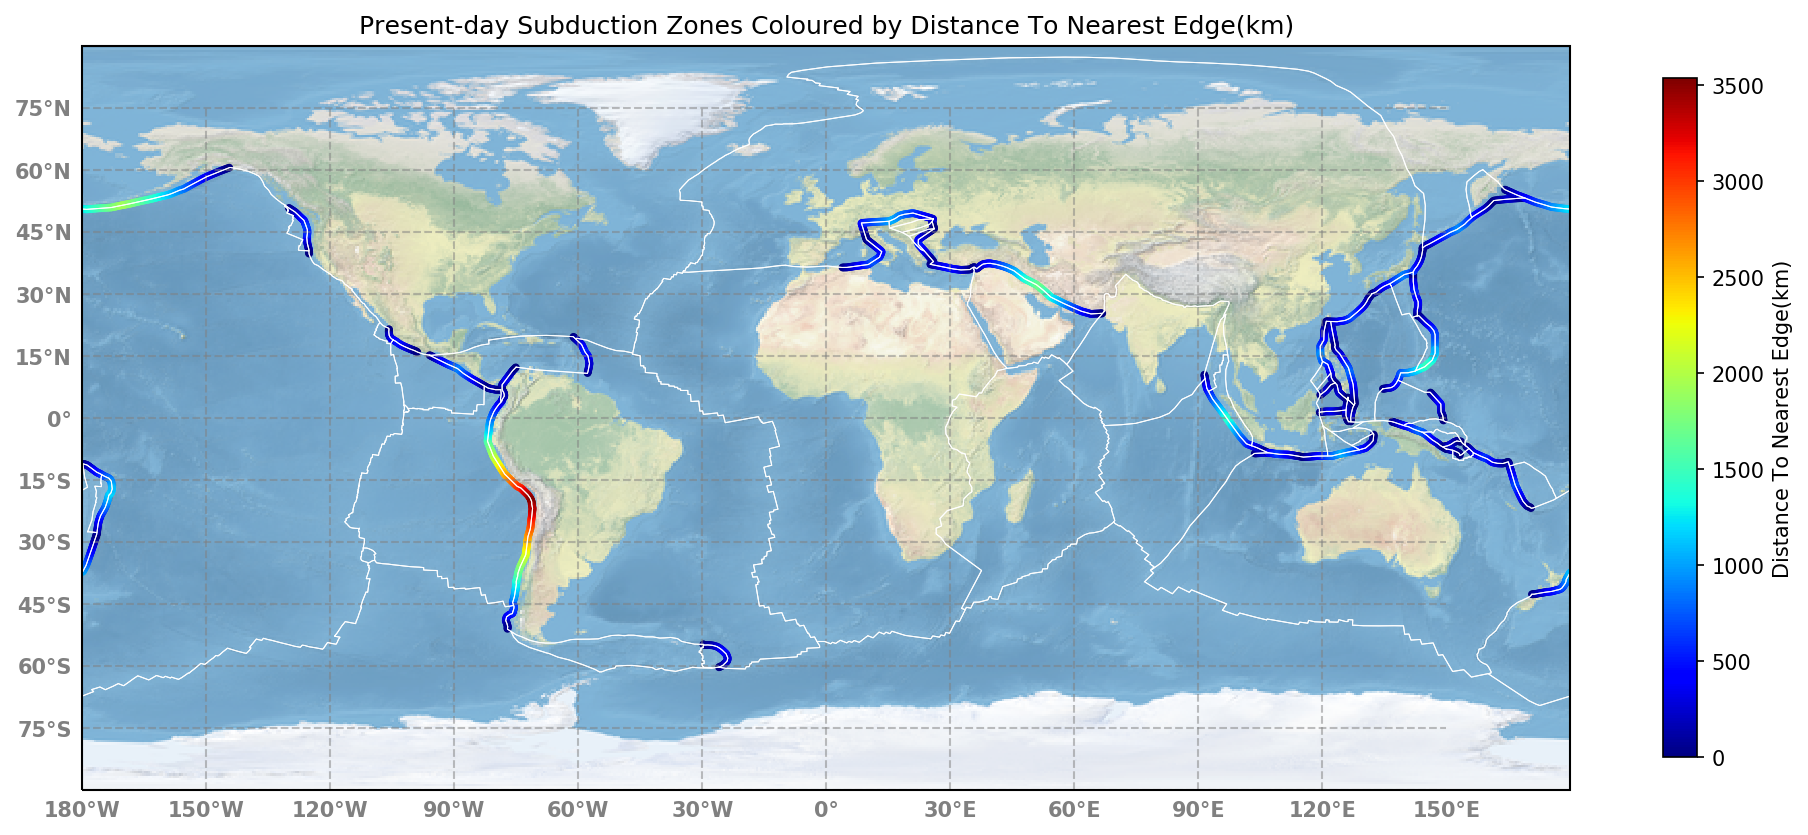

In [5]:
%matplotlib inline

import requests, os, glob
import pygplates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

trench_data = Utils.get_trench_points(0)

#get topological plates boundaries
time = 0
resolved_topologies = []
shared_boundary_sections = []

rotation_files = Utils.get_files(Utils.get_parameter('rotation_files'))
topology_files = Utils.get_files(Utils.get_parameter("topology_files"))
   
#use pygplates to resolve the topologies
pygplates.resolve_topologies(topology_files, rotation_files, resolved_topologies, time, 
                             shared_boundary_sections)

geoms = [t.get_resolved_boundary() for t in resolved_topologies]           

#now, plot the data in a global map    
fig = plt.figure(figsize=(16,12),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([-180, 180, -90, 90])
for geom in geoms:
    lat, lon =zip(*(geom.to_lat_lon_list()))
    plt.plot(lon, lat,
         color='white', linewidth=.5, #the topological plates boundaries in white
         transform=ccrs.Geodetic(),
    )
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(range(-180,180,30))
gl.ylocator = mticker.FixedLocator(range(-90,90,15))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'color': 'gray', 'weight': 'bold'}

#the subduction sample points are colored by property value.
cb=ax.scatter(trench_data['trench_lon'], trench_data['trench_lat'], 30, marker='.', 
              c=trench_data['dist_nearest_edge']* 6371. * np.pi / 180, cmap=plt.cm.jet)
plt.title('Present-day Subduction Zones Coloured by Distance To Nearest Edge(km)')
fig.colorbar(cb, shrink=0.5, label='Distance To Nearest Edge(km)')
plt.show()

##### Take a closer look at the region of interest

reading ../data/polygon_north_america_julian.csv


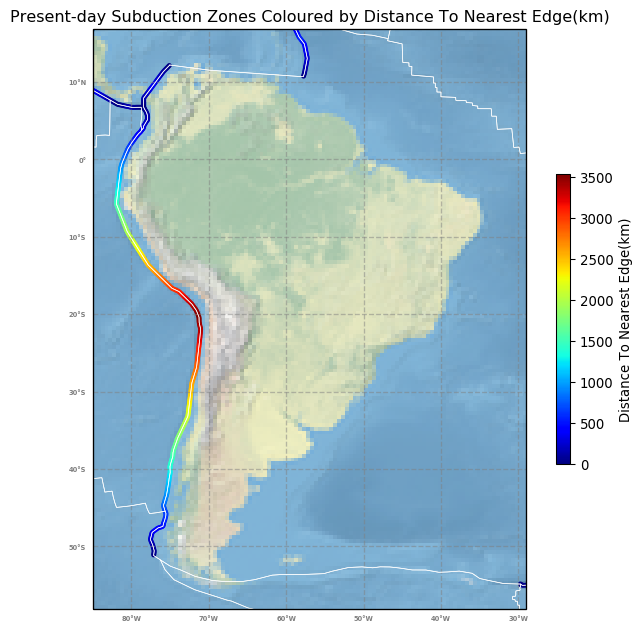

In [6]:
%matplotlib inline
import Utils

region_of_interest_polygon = Utils.get_region_of_interest_polygon()
#display(region_of_interest_polygon)

mesh_points = Utils.get_mesh_points(region_of_interest_polygon.values.flatten())

#now, plot the data in a regional map    
fig = plt.figure(figsize=(8,8),dpi=96)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent(Utils.get_region_of_interest_extent())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(range(-180,180,10))
gl.ylocator = mticker.FixedLocator(range(-90,90,10))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'gray', 'weight': 'bold', 'fontsize': '5'}
gl.ylabel_style = {'color': 'gray', 'weight': 'bold', 'fontsize': '5'}

for geom in geoms:
    lat, lon =zip(*(geom.to_lat_lon_list()))
    plt.plot(lon, lat,
         color='white', linewidth=.5, #the topological plates boundaries in white
         transform=ccrs.Geodetic(),
    )
#the subduction sample points are colored by property value. see "color_by" above
cb=ax.scatter(trench_data['trench_lon'], trench_data['trench_lat'], 30, marker='.', 
              c=trench_data['dist_nearest_edge']* 6371. * np.pi / 180, cmap=plt.cm.jet)
plt.plot(region_of_interest_polygon['lon'],region_of_interest_polygon['lat'], transform=ccrs.Geodetic())
ax.scatter(mesh_points['lon'], mesh_points['lat'], 10, marker='.',color='yellow')
plt.title('Present-day Subduction Zones Coloured by Distance To Nearest Edge(km)')
fig.colorbar(cb, shrink=0.5, label='Distance To Nearest Edge(km)')
plt.show()


#### Plot a reconstruction map
This is a reconstructed map with a paleo-age grid, paleo-coastlines, plate boundaries and subduction teeth.

./AgeGrids/Muller_etal_2016_AREPS_v1.17_AgeGrid-0.nc
reconstructing geometries...


/opt/conda/envs/pyGEOL/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1752: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  u, v = self.projection.transform_vectors(t, x, y, u, v)


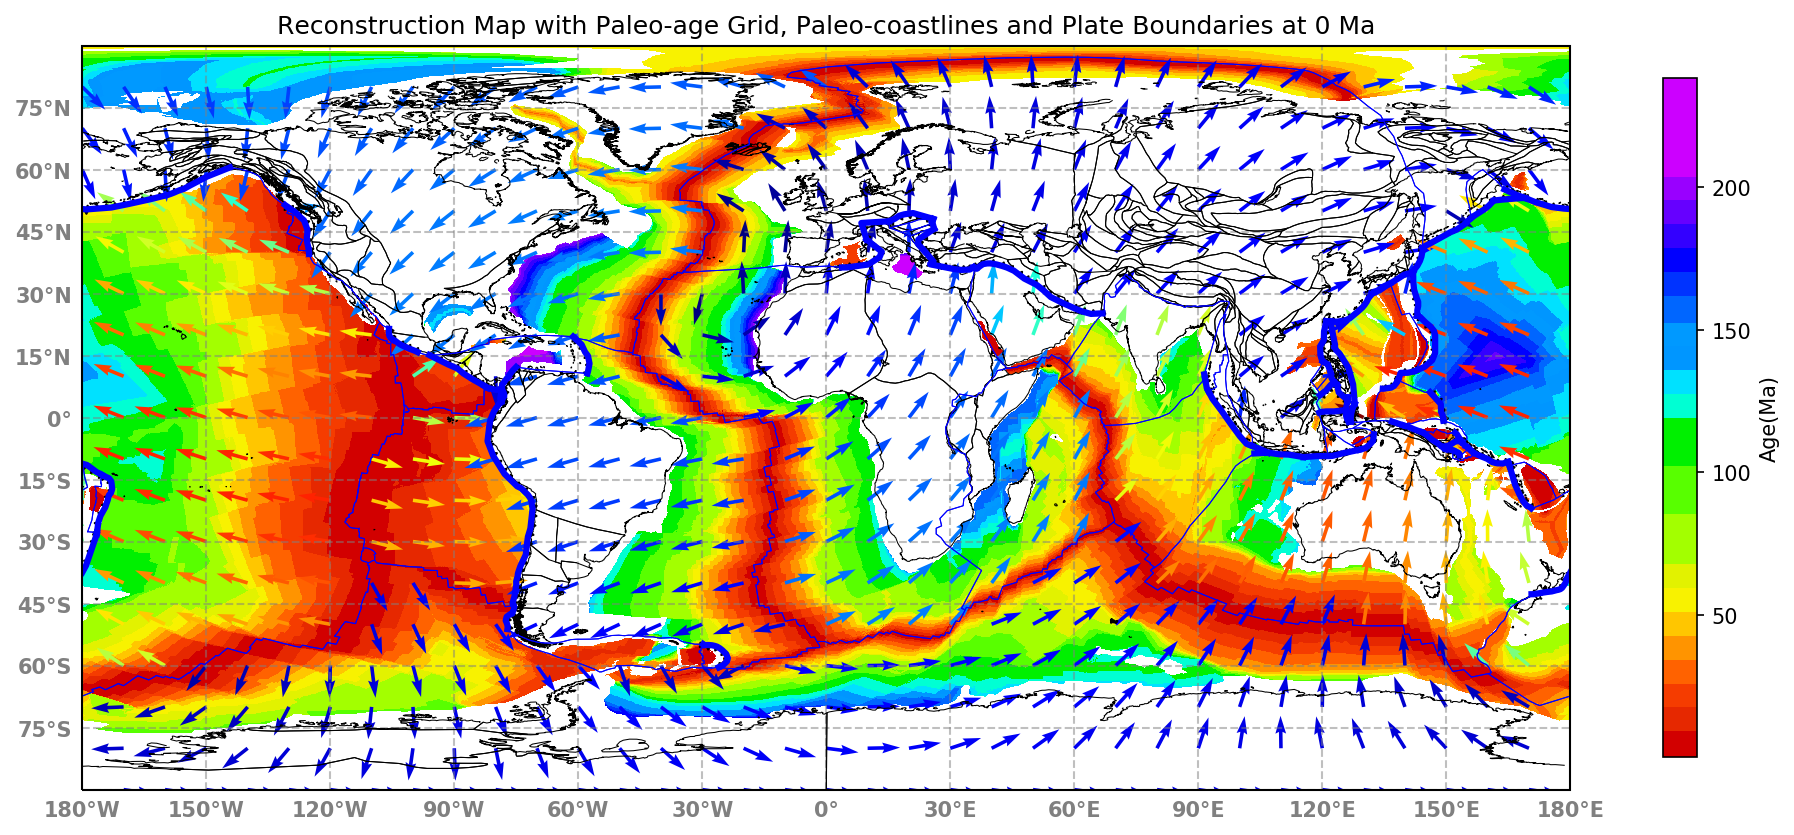

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
from netCDF4 import Dataset
from shapely.geometry.polygon import LinearRing

import Utils, pygplates

time = 0
draw_velocity_vectors = True

#change the extent to see specific area
#map_extent = [-85, -30, -55, 15]
map_extent = [-180, 180, -90, 90]

agegrid_file = Utils.download_agegrid(time)
print(agegrid_file)
agegrid_cmap = Utils.get_age_grid_color_map_from_cpt('agegrid.cpt')

#reconstruct coastlines and topology
print("reconstructing geometries...")

resolved_topologies = []
shared_boundary_sections = []
#use pygplates to resolve the topologies
pygplates.resolve_topologies(topology_files, rotation_files, resolved_topologies, time, 
                             shared_boundary_sections)

#coastlines
reconstructed_geometries = []
pygplates.reconstruct(
                Utils.get_parameter('coastlines'),  
                rotation_files, 
                reconstructed_geometries, 
                time, 0)

#subduction zones
subduction_geoms=[]
Utils.get_subduction_geometries(subduction_geoms, shared_boundary_sections)

#velocity vectors
x,y, u,v = Utils.get_velocity_x_y_u_v(time,pygplates.RotationModel(rotation_files),topology_files)
       
# plot the map
fig = plt.figure(figsize=(16,12),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent(map_extent)

if agegrid_file:
    img = Dataset(agegrid_file) #age grid
    cb=ax.imshow(img.variables['z'], origin='lower', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90], cmap=agegrid_cmap)

#plot coastlines
for geom in reconstructed_geometries:
    lat, lon =zip(*(geom.get_reconstructed_geometry().to_lat_lon_list()))
    plt.plot(lon, lat,
         color='black', linewidth=.5, #the coastlines in black
         transform=ccrs.Geodetic(),
    )

#plot topological plates boundaries
for t in resolved_topologies:
    lat, lon =zip(*(t.get_resolved_boundary().to_lat_lon_list()))
    plt.plot(lon, lat,
         color='blue', linewidth=.5, #the topological plates boundaries in blue
         transform=ccrs.Geodetic(),
    )
 
#plot subduction zones
for geom, aspect in subduction_geoms:
    lat, lon =zip(*(geom.to_lat_lon_list()))
    plt.plot(lon, lat,
         color='blue', linewidth=3, #the subduction zones in blue
         transform=ccrs.Geodetic(),
    )
    teeth = Utils.get_subduction_teeth(lon, lat, triangle_aspect=aspect)
    for tooth in teeth:
        ring = LinearRing(tooth)
        ax.add_geometries([ring], ccrs.PlateCarree(), facecolor='b', edgecolor='black', alpha=1)

 
if draw_velocity_vectors:
    #draw the velocity vectors
    #Some arrows are long and some are very short. To make the plot clearer, we nomalize the velocity magnitude.
    #And use color to denote the different speed.
    u = np.array(u)
    v = np.array(v)
    mag = np.sqrt(u*u+v*v)
    u = u/mag
    v = v/mag
    ax.quiver(x, y, u, v, mag,transform=ccrs.PlateCarree(),cmap='jet')    

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
gl.ylocator = mticker.FixedLocator([-90, -75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'color': 'gray', 'weight': 'bold'}


if agegrid_file:
    plt.title(f'Reconstruction Map with Paleo-age Grid, Paleo-coastlines and Plate Boundaries at {time} Ma')
    fig.colorbar(cb, shrink=0.5, label='Age(Ma)')
else:
    plt.title(f'Reconstruction Map with Paleo-coastlines and Plate Boundaries at {time} Ma')

plt.show()   

##### make a subduction zones animation

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry.polygon import LinearRing
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import Utils, pygplates

p_time = Utils.get_parameter('time')
start_time = p_time['start'] 
end_time = p_time['end']
time_step = p_time['step']

map_extent = [-180, 180, -90, 90]
 
rotation_files = Utils.get_files(Utils.get_parameter('rotation_files'))
coastlines_file = Utils.get_parameter('coastlines')

for time in range(start_time, end_time+1, 10):
    #coastlines
    reconstructed_geometries = []
    pygplates.reconstruct(
                    coastlines_file, 
                    rotation_files, 
                    reconstructed_geometries, 
                    time, 0)

    #subduction zones
    '''
    topology_files = Utils.get_files(Utils.get_parameter("topology_files"))
    resolved_topologies = []
    shared_boundary_sections = []
    #use pygplates to resolve the topologies
    pygplates.resolve_topologies(topology_files, rotation_files, resolved_topologies, time, 
                                 shared_boundary_sections)
    subduction_geoms=[]
    Utils.get_subduction_geometries(subduction_geoms, shared_boundary_sections)
    '''

    # plot the map
    fig = plt.figure(figsize=(16,12),dpi=144)
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
    ax.set_extent(map_extent)

    #plot coastlines
    for geom in reconstructed_geometries:
        lat, lon =zip(*(geom.get_reconstructed_geometry().to_lat_lon_list()))
        plt.plot(lon, lat,
             color='black', linewidth=.5, #the coastlines in black
             transform=ccrs.Geodetic(),
        )

    #plot subduction zones
    '''
    for geom, aspect in subduction_geoms:
        lat, lon =zip(*(geom.to_lat_lon_list()))
        plt.plot(lon, lat,
             color='blue', linewidth=1, #the subduction zones in blue
             transform=ccrs.Geodetic(),
        )
        teeth = Utils.get_subduction_teeth(lon, lat, triangle_aspect=aspect)
        for tooth in teeth:
            ring = LinearRing(tooth)
            ax.add_geometries([ring], ccrs.PlateCarree(), facecolor='b', edgecolor='black', alpha=1)
    '''

    trench_data = Utils.get_trench_points(time)
    #the subduction sample points are colored by property value. see "color_by" above
    cb=ax.scatter(trench_data['trench_lon'], trench_data['trench_lat'], 50, marker='.', 
                  c=trench_data['dist_nearest_edge']* 6371. * np.pi / 180, cmap=plt.cm.jet, vmax=3000, vmin=0)

    fig.colorbar(cb, shrink=0.5, label='Distance To Nearest Edge(km)')

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
    gl.ylocator = mticker.FixedLocator([-90, -75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'color': 'gray', 'weight': 'bold'}

    plt.title(f'Subduction Zones at {time} Ma')
    plt.savefig(Utils.get_tmp_dir() + f'subduction_zones_{time}_Ma.png',bbox_inches='tight',pad_inches=0)
    print(f'plotting {time}Ma')
    plt.close()
    #plt.show()   
   

plotting 0Ma
plotting 10Ma
plotting 20Ma
plotting 30Ma
plotting 40Ma
plotting 50Ma
plotting 60Ma
plotting 70Ma
plotting 80Ma
plotting 90Ma
plotting 100Ma
plotting 110Ma
plotting 120Ma
plotting 130Ma
plotting 140Ma
plotting 150Ma
plotting 160Ma
plotting 170Ma
plotting 180Ma
plotting 190Ma
plotting 200Ma
plotting 210Ma
plotting 220Ma
plotting 230Ma


In [9]:
%%capture --no-stdout

import moviepy.editor as mpy
import Utils

p_time = Utils.get_parameter('time')
start_time = p_time['start'] 
end_time = p_time['end']
time_step = p_time['step']

frame_list = [Utils.get_tmp_dir() + f'subduction_zones_{time}_Ma.png' for time in range(start_time, end_time+1, 10)]
clip = mpy.ImageSequenceClip(frame_list, fps=2)
clip.write_gif(Utils.get_tmp_dir() + "subduction_zones.gif")
clip.write_videofile(Utils.get_tmp_dir() + "subduction_zones.mp4")
print('done')

ModuleNotFoundError: No module named 'moviepy'

In [10]:
import io, base64

from IPython.display import HTML

video = io.open(Utils.get_tmp_dir() + "subduction_zones.mp4", 'r+b').read()

encoded = base64.b64encode(video)

HTML(data='''<video width=960 alt="subduction zones animation" controls>

<source src="data:video/mp4;base64,{0}" type="video/mp4" /> </video>'''.format(encoded.decode('ascii')))


FileNotFoundError: [Errno 2] No such file or directory: '/tmp/subduction_zones.mp4'

#### This is the end of step 1 and now open the step 2 notebook --  "2_Plot_and_Select_Mineral_Resources.ipynb"